# Deutsch's Algorithm to Tackle the Parity Problem

- Problem Statement: Given a function $ f: \{0, 1\}^n \rightarrow \{0, 1\} $, determine whether $ f $ is constant (outputs the same value for all inputs) or balanced (outputs 0 for half of the inputs and 1 for the other half) using the fewest number of queries.

- Solution Overview: Deutsch's algorithm leverages quantum superposition and interference to solve the problem with a single query, in contrast to classical algorithms that may require multiple queries.

In [63]:
from math import atan2
from qiskit import QuantumCircuit
import qiskit_aer as aer
import numpy as np
from qiskit.circuit.library import UnitaryGate

## Let's tackle creating a circuit to simulate Deutsch's algorithm
1. Create the oracle circuit $U_f$

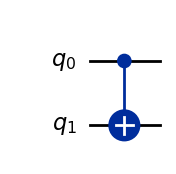

In [67]:

oracle = QuantumCircuit(2)
oracle.cx(0, 1)  # Control on input qubit, target output qubit
Uf = oracle.to_gate()
Uf.name = "$U_f$"

oracle.draw('mpl')

2. With our $U_f$ defined, we can create our main circuit

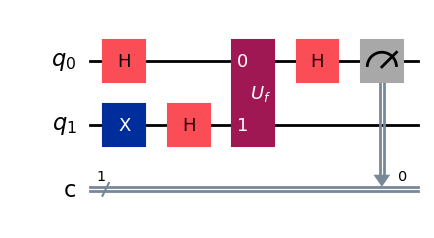

In [69]:
# Main Deutsch circuit
qc = QuantumCircuit(2, 1)

# Step 1: prepare input in |+>, output in |->
qc.h(0)
qc.x(1)
qc.h(1)

# Step 2: apply oracle
qc.append(Uf, [0, 1])

# Step 3: Hadamard on input
qc.h(0)

# Step 4: measure input
qc.measure(0, 0)

qc.draw('mpl')